In [190]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [191]:

hmw_data = pd.read_csv("./homework4.csv")
hmw_data = hmw_data.rename(columns={"Unnamed: 0":"data id"})
hmw_data.head(5)

,data id,x1,x2,x3,d,y
0,1,0.789667,0.186084,0.601233,True,1.775711
1,2,0.091169,0.018968,0.602491,False,0.702007
2,3,0.839708,0.137707,0.439575,False,4.818743
3,4,0.373535,0.177271,0.419393,False,2.921435
4,5,0.141337,0.785985,0.140322,False,0.663376


In [192]:

empty_dict = {'estimator-name': [0] * 11, 'mean-ATE': [0] * 11, 'CI-ATE': [0] * 11}

est_table = pd.DataFrame(empty_dict)

est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


<h3>Estimator 0</h3>

In [193]:
def est_regression(data,est_type):
    est_0_data = data
    num_sim = 200
    sample_size = 500

    beta_arr = []

    for i in range(0,num_sim,1):
    
            # get a sample with replacement from the DataFrame
            sample = est_0_data.sample(n=sample_size, replace=True)

            # X = hmw_data[["x1","x2","x3","d"]]
            if(est_type == "estimator_0"):
                X = sample[["d"]]
                y = sample[["y"]]

            elif(est_type == "estimator_1_1"):
                X = sample[['d','x1','x2','x3']]
                y = sample[["y"]]
                
            elif(est_type == "estimator_1_2"):
                X = sample[['d','x1']]
                y = sample[["y"]]
            
            elif(est_type == "estimator_2_1"):
                X = sample[['d','p_est_1']]
                y = sample[["y"]]

            elif(est_type == "estimator_2_2"):
                X = sample[['d','p_est_2']]
                y = sample[["y"]]
            
            else:
                
                raise ValueError("Please enter a good estimator type!!")
                 

            regressor = LinearRegression()
            regressor.fit(X, y)
            
            # Get the model estimates
            coefficients = regressor.coef_
            intercept = regressor.intercept_

            # Print the estimates
            # print("Coefficients:", coefficients)
            # print("Intercept:", intercept)

            beta_arr.append(coefficients[0][0])
    return beta_arr

In [194]:
def ate_ci(est_arr,est_index,est_name):
    mean = np.mean(est_arr)
    std_dev = np.std(est_arr)

    # Calculate the standard error of the mean
    std_error = std_dev / np.sqrt(len(est_arr))

    # Calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
    t_value = stats.t.ppf(0.975, len(est_arr)-1)

    # Calculate the confidence interval
    confidence_interval = (round(mean - t_value * std_error,4),round( mean + t_value * std_error,4))

    est_table.loc[est_index,"estimator-name"] = est_name
    est_table.loc[est_index,"mean-ATE"] = mean
    est_table.loc[est_index,"CI-ATE"] = str(confidence_interval)

    print("mean: ",mean)
    print("95% Confidence Interval:", confidence_interval)

In [195]:
est_0_data = hmw_data[['d','y']]
est_0_arr = est_regression(est_0_data,"estimator_0")
len(est_0_arr)

200

In [196]:
ate_ci(est_0_arr,0,"estimator 0")

mean:  1.4150459796194845
95% Confidence Interval: (1.3878, 1.4423)


In [197]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,0,0.000000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0


In [198]:

# est_0_data = hmw_data[['d','y']]
# num_sim = 200
# sample_size = 500

# beta_arr = []

# for i in range(0,num_sim,1):
 
#         # get a sample with replacement from the DataFrame
#         sample = est_0_data.sample(n=sample_size, replace=True)

#         # X = hmw_data[["x1","x2","x3","d"]]
#         X = sample[["d"]]
#         y = sample[["y"]]

#         regressor = LinearRegression()
#         regressor.fit(X, y)
        
#         # Get the model estimates
#         coefficients = regressor.coef_
#         intercept = regressor.intercept_

#         # Print the estimates
#         # print("Coefficients:", coefficients)
#         # print("Intercept:", intercept)

#         beta_arr.append(coefficients[0][0])

# len(beta_arr)

In [199]:
# mean = np.mean(beta_arr)
# std_dev = np.std(beta_arr)

# # Calculate the standard error of the mean
# std_error = std_dev / np.sqrt(len(beta_arr))

# # Calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
# t_value = stats.t.ppf(0.975, len(beta_arr)-1)

# # Calculate the confidence interval
# confidence_interval = (round(mean - t_value * std_error,4),round( mean + t_value * std_error,4))

# est_table.loc[0,"estimator-name"] = "estimator 0"
# est_table.loc[0,"mean-ATE"] = mean
# est_table.loc[0,"CI-ATE"] = str(confidence_interval)

# print("mean: ",mean)
# print("95% Confidence Interval:", confidence_interval)

In [200]:
# est_table

<h3>Estimator 1.1</h3>

In [201]:
est_1_1_data = hmw_data[['x1','x2','x3','d','y']]
est_1_1_arr = est_regression(est_1_1_data,"estimator_1_1")
len(est_1_1_arr)

200

In [202]:
ate_ci(est_1_1_arr,1,"estimator 1.1")

mean:  1.0600081535299215
95% Confidence Interval: (1.0316, 1.0884)


In [203]:

# est_1_1_data = hmw_data[['x1','x2','x3','d','y']]
# num_sim = 200
# sample_size = 500

# beta_arr_1_1 = []

# for i in range(0,num_sim,1):
 
#         # get a sample with replacement from the DataFrame
#         sample = est_1_1_data.sample(n=sample_size, replace=True)

#         # X = hmw_data[["x1","x2","x3","d"]]
#         X = sample[['x1','x2','x3','d']]
#         y = sample[["y"]]

#         regressor = LinearRegression()
#         regressor.fit(X, y)
        
#         # Get the model estimates
#         coefficients = regressor.coef_
#         intercept = regressor.intercept_

#         # Print the estimates
#         # print("Coefficients:", coefficients)
#         # print("Intercept:", intercept)

#         beta_arr_1_1.append(coefficients[0][0])

# len(beta_arr_1_1)

In [204]:
# mean = np.mean(beta_arr_1_1)
# std_dev = np.std(beta_arr_1_1)

# # Calculate the standard error of the mean
# std_error = std_dev / np.sqrt(len(beta_arr_1_1))

# # Calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
# t_value = stats.t.ppf(0.975, len(beta_arr_1_1)-1)

# # Calculate the confidence interval
# confidence_interval = (round(mean - t_value * std_error,4),round( mean + t_value * std_error,4))

# est_table.loc[1,"estimator-name"] = "estimator 1.1"
# est_table.loc[1,"mean-ATE"] = mean
# est_table.loc[1,"CI-ATE"] = str(confidence_interval)

# print("mean: ",mean)
# print("95% Confidence Interval:", confidence_interval)

In [205]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0


<h3>Estimator 1.2</h3>

In [206]:
est_1_2_data = hmw_data[['d','x1','y']]
est_1_2_arr = est_regression(est_1_2_data,"estimator_1_2")
len(est_1_2_arr)

200

In [207]:
ate_ci(est_1_2_arr,2,"estimator 1.2")

mean:  1.3158520618584941
95% Confidence Interval: (1.2899, 1.3418)


In [208]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,0,0.000000,0
4,0,0.000000,0


In [209]:
# est_1_1_data = hmw_data[['x1','x2','x3','d','y']]
# num_sim = 200
# sample_size = 500

# beta_arr_1_1 = []

# for i in range(0,num_sim,1):
 
#         # get a sample with replacement from the DataFrame
#         sample = est_1_1_data.sample(n=sample_size, replace=True)

#         # X = hmw_data[["x1","x2","x3","d"]]
#         X = sample[['x1','x2','x3','d']]
#         y = sample[["y"]]

#         regressor = LinearRegression()
#         regressor.fit(X, y)
        
#         # Get the model estimates
#         coefficients = regressor.coef_
#         intercept = regressor.intercept_

#         # Print the estimates
#         # print("Coefficients:", coefficients)
#         # print("Intercept:", intercept)

#         beta_arr_1_1.append(coefficients[0][0])

# len(beta_arr_1_1)

<h3>Estimator 2.1</h3>

In [210]:
# from sklearn.linear_model import LogisticRegression

# #propensity score estimation with full control var

# # create a logistic regression model
# lr = LogisticRegression()

# X = hmw_data[['x1','x2','x3']]
# y = hmw_data[["d"]]

# # fit the model on the training data
# lr.fit(X, y)

# # make predictions on the testing data
# y_pred = lr.predict(X)

# len(y_pred)

from sklearn.linear_model import LogisticRegression

# Define the outcome variable and the covariates
X = hmw_data[['x1','x2','x3']]
y = hmw_data[["d"]]

# Fit a logistic regression model
logit = LogisticRegression(solver='lbfgs', max_iter=1000)
logit.fit(X, y)

# Calculate the propensity score
y_pred = logit.predict_proba(X)[:, 1]

len(y_pred)

5000

In [211]:
hmw_data_new = pd.concat([hmw_data, pd.DataFrame(y_pred, columns=['p_est_1'])], axis=1)
sum(hmw_data_new['p_est_1'])

1596.9945465903297

In [212]:
est_2_1_data = hmw_data_new[['d','p_est_1','y']]
est_2_1_arr = est_regression(est_2_1_data,"estimator_2_1")
len(est_2_1_arr)

200

In [213]:
ate_ci(est_2_1_arr,3,"estimator 2.1")

mean:  1.039010319703126
95% Confidence Interval: (1.0122, 1.0658)


In [214]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,0,0.000000,0


<h3>Estimator 2.2</h3>


In [215]:
from sklearn.linear_model import LogisticRegression

#propensity score estimation with partial control var

# # create a logistic regression model
# lr = LogisticRegression()

# X = hmw_data[['x1']]
# y = hmw_data[["d"]]

# # fit the model on the training data
# lr.fit(X, y)

# # make predictions on the testing data
# y_pred = lr.predict(X)

# sum(y_pred)

from sklearn.linear_model import LogisticRegression

# Define the outcome variable and the covariates
X = hmw_data[['x1']]
y = hmw_data[["d"]]

# Fit a logistic regression model
logit = LogisticRegression(solver='lbfgs', max_iter=1000)
logit.fit(X, y)

# Calculate the propensity score
y_pred = logit.predict_proba(X)[:, 1]

len(y_pred)

5000

In [216]:
hmw_data_new = pd.concat([hmw_data_new, pd.DataFrame(y_pred, columns=['p_est_2'])], axis=1)
hmw_data_new.head(5)

,data id,x1,x2,x3,d,y,p_est_1,p_est_2
0,1,0.789667,0.186084,0.601233,True,1.775711,0.336005,0.411969
1,2,0.091169,0.018968,0.602491,False,0.702007,0.111218,0.198348
2,3,0.839708,0.137707,0.439575,False,4.818743,0.283990,0.430144
3,4,0.373535,0.177271,0.419393,False,2.921435,0.158755,0.273706
4,5,0.141337,0.785985,0.140322,False,0.663376,0.168991,0.210503


In [217]:
est_2_2_data = hmw_data_new[['d','p_est_2','y']]
est_2_2_arr = est_regression(est_2_2_data,"estimator_2_2")
len(est_2_2_arr)

200

In [218]:
ate_ci(est_2_2_arr,4,"estimator 2.2")

mean:  1.3148229716388766
95% Confidence Interval: (1.2882, 1.3414)


In [219]:
est_table.head(6)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,0,0.000000,0


<h3>Estimator 3.1</h3>

In [220]:

num_sim = 200
sample_size = 500

est_3_1_arr = []

for i in range(0,num_sim,1):

        # get a sample with replacement from the DataFrame
        sample = hmw_data_new.sample(n=sample_size, replace=True)

        first_sum =  np.sum((sample['d']*sample['y'])/(sample['p_est_1']))
        second_sum = np.sum(((1-sample['d'])*sample['y'])/(1-sample['p_est_1']))

        treat_est_3_1 = (1/len(sample))*(first_sum-second_sum)
        est_3_1_arr.append(treat_est_3_1)
# np.mean(est_treat_arr)
len(est_3_1_arr)

200

In [221]:
ate_ci(est_3_1_arr,5,"estimator 3.1")

mean:  1.0576043956183403
95% Confidence Interval: (1.0194, 1.0958)


In [222]:
est_table.head(10)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
6,0,0.000000,0
7,0,0.000000,0
8,0,0.000000,0
9,0,0.000000,0


<h3>Estimator 3.2</h3>

In [223]:
num_sim = 200
sample_size = 500

est_3_2_arr = []

for i in range(0,num_sim,1):

        # get a sample with replacement from the DataFrame
        sample = hmw_data_new.sample(n=sample_size, replace=True)

        first_sum =  np.sum((sample['d']*sample['y'])/(sample['p_est_2']))
        second_sum = np.sum(((1-sample['d'])*sample['y'])/(1-sample['p_est_2']))

        treat_est_3_2 = (1/len(sample))*(first_sum-second_sum)
        est_3_2_arr.append(treat_est_3_2)
# np.mean(est_treat_arr)
len(est_3_2_arr)

200

In [224]:
ate_ci(est_3_2_arr,6,"estimator 3.2")

mean:  1.2873880321013729
95% Confidence Interval: (1.243, 1.3318)


In [225]:
est_table.head(10)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
6,estimator 3.2,1.287388,"(1.243, 1.3318)"
7,0,0.000000,0
8,0,0.000000,0
9,0,0.000000,0


<h3>Estimator 4.1</h3>

In [226]:
import warnings

warnings.filterwarnings("ignore")

num_sim = 200
sample_size = 500

est_4_1_arr = []

for i in range(0,num_sim,1):

    sample = hmw_data_new.sample(n=sample_size, replace=True)

    control_data = sample[sample['d'] == 0]
    treat_data = sample[sample['d'] == 1]

    max_p_1_ctr = max(control_data['p_est_1'])
    max_p_1_treat = max(treat_data['p_est_1'])

    min_p_1_ctr = min(control_data['p_est_1'])
    min_p_1_treat = min(treat_data['p_est_1'])

    upper_filter = min(max_p_1_treat,max_p_1_ctr)
    lower_filter = max(min_p_1_treat,min_p_1_ctr)

    hmw_data_new_2 = sample[(sample['p_est_1'] < upper_filter) & (sample['p_est_1'] > lower_filter)]
    len(hmw_data_new_2)

    # Split the dataframe into equally spaced groups
    n_groups = 20  # number of groups
    hmw_data_new_2['Group'] = pd.qcut(hmw_data_new_2['y'], q=n_groups, labels=False,duplicates='drop')
    # hmw_data_new_2['Group'].unique()
    hmw_data_new_2 = hmw_data_new_2.sort_values(by=['Group'])

    single_trt_est_1 = 0

    for i in range(0,20,1): 
        sub_group = hmw_data_new_2[hmw_data_new_2['Group'] == i]
        sub_group = sub_group.reset_index()
        # print((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        first_sum =  np.sum((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        
        second_sum = np.sum(((1-sub_group['d'])*sub_group['y'])/(1-sub_group['p_est_1']))

        treat_est_3_1 = (1/len(sub_group))*(first_sum-second_sum)
        # print(treat_est_3_1)
        single_trt_est_1 = single_trt_est_1 + (treat_est_3_1*(len(sub_group)/len(hmw_data_new_2)))

    est_4_1_arr.append(single_trt_est_1)


In [227]:
ate_ci(est_4_1_arr,7,"estimator 4.1")

mean:  1.0517352649825993
95% Confidence Interval: (1.0101, 1.0933)


In [228]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
6,estimator 3.2,1.287388,"(1.243, 1.3318)"
7,estimator 4.1,1.051735,"(1.0101, 1.0933)"
8,0,0.000000,0
9,0,0.000000,0


<h3>Estimator 4.2</h3>

In [229]:
import warnings

warnings.filterwarnings("ignore")

num_sim = 200
sample_size = 500

est_4_2_arr = []

for i in range(0,num_sim,1):

    sample = hmw_data_new.sample(n=sample_size, replace=True)

    control_data = sample[sample['d'] == 0]
    treat_data = sample[sample['d'] == 1]

    max_p_1_ctr = max(control_data['p_est_2'])
    max_p_1_treat = max(treat_data['p_est_2'])

    min_p_1_ctr = min(control_data['p_est_2'])
    min_p_1_treat = min(treat_data['p_est_2'])

    upper_filter = min(max_p_1_treat,max_p_1_ctr)
    lower_filter = max(min_p_1_treat,min_p_1_ctr)

    hmw_data_new_2 = sample[(sample['p_est_2'] < upper_filter) & (sample['p_est_2'] > lower_filter)]
    len(hmw_data_new_2)

    # Split the dataframe into equally spaced groups
    n_groups = 20  # number of groups
    hmw_data_new_2['Group'] = pd.qcut(hmw_data_new_2['y'], q=n_groups, labels=False,duplicates='drop')
    # hmw_data_new_2['Group'].unique()
    hmw_data_new_2 = hmw_data_new_2.sort_values(by=['Group'])

    single_trt_est_2 = 0

    for i in range(0,20,1): 
        sub_group = hmw_data_new_2[hmw_data_new_2['Group'] == i]
        sub_group = sub_group.reset_index()
        # print((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        first_sum =  np.sum((sub_group['d']*sub_group['y'])/(sub_group['p_est_2']))
        
        second_sum = np.sum(((1-sub_group['d'])*sub_group['y'])/(1-sub_group['p_est_2']))

        treat_est_3_2 = (1/len(sub_group))*(first_sum-second_sum)
        # print(treat_est_3_1)
        single_trt_est_2 = single_trt_est_2 + (treat_est_3_2*(len(sub_group)/len(hmw_data_new_2)))

    est_4_2_arr.append(single_trt_est_2)


In [230]:
ate_ci(est_4_2_arr,8,"estimator 4.2")

mean:  1.270007422648191
95% Confidence Interval: (1.2295, 1.3105)


In [231]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
6,estimator 3.2,1.287388,"(1.243, 1.3318)"
7,estimator 4.1,1.051735,"(1.0101, 1.0933)"
8,estimator 4.2,1.270007,"(1.2295, 1.3105)"
9,0,0.000000,0


<h3>Estimator 5.1</h3>

In [232]:
warnings.filterwarnings("ignore")

num_sim = 200
sample_size = 500

est_5_1_arr = []

for i in range(0,num_sim,1):
    sample = hmw_data_new.sample(n=sample_size, replace=True)
    weigth_1 = np.sqrt((sample['d']/sample['p_est_1'])+((1-sample['d'])/(1-sample['p_est_1'])))

    X = sample[['d','x1','x2','x3']]
    y = sample[["y"]]

    regressor = LinearRegression()
    regressor.fit(X, y,sample_weight=weigth_1)

    # Get the model estimates
    coefficients = regressor.coef_
    # intercept = regressor.intercept_

    # Print the estimates
    # print("Coefficients:", coefficients)
    # print("Intercept:", intercept)

    est_5_1_arr.append(coefficients[0][0])

len(est_5_1_arr)

200

In [233]:
ate_ci(est_5_1_arr,9,"estimator 5.1")

mean:  1.0349751186411906
95% Confidence Interval: (1.005, 1.065)


In [234]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
6,estimator 3.2,1.287388,"(1.243, 1.3318)"
7,estimator 4.1,1.051735,"(1.0101, 1.0933)"
8,estimator 4.2,1.270007,"(1.2295, 1.3105)"
9,estimator 5.1,1.034975,"(1.005, 1.065)"


<h3>Estimator 5.2</h3>

In [239]:
warnings.filterwarnings("ignore")

num_sim = 200
sample_size = 500

est_5_2_arr = []

for i in range(0,num_sim,1):
    sample = hmw_data_new.sample(n=sample_size, replace=True)
    weigth_2 = np.sqrt((sample['d']/sample['p_est_2'])+((1-sample['d'])/(1-sample['p_est_2'])))

    X = sample[['d','x1','x2','x3']]
    y = sample[["y"]]

    regressor = LinearRegression()
    regressor.fit(X, y,sample_weight=weigth_2)

    # Get the model estimates
    coefficients = regressor.coef_
    # intercept = regressor.intercept_

    # Print the estimates
    # print("Coefficients:", coefficients)
    # print("Intercept:", intercept)

    est_5_2_arr.append(coefficients[0][0])

len(est_5_2_arr)

200

In [240]:
ate_ci(est_5_2_arr,10,"estimator 5.2")

mean:  1.0402060224512504
95% Confidence Interval: (1.0112, 1.0692)


<h1>Problem 1</h1>

In [241]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
6,estimator 3.2,1.287388,"(1.243, 1.3318)"
7,estimator 4.1,1.051735,"(1.0101, 1.0933)"
8,estimator 4.2,1.270007,"(1.2295, 1.3105)"
9,estimator 5.1,1.034975,"(1.005, 1.065)"


<h1>Problem 2</h1>

In [242]:
subset = est_table.loc[est_table['estimator-name'].isin(['estimator 0', 'estimator 1.1','estimator 2.1','estimator 3.1','estimator 4.1','estimator 5.1'])]
subset

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
1,estimator 1.1,1.060008,"(1.0316, 1.0884)"
3,estimator 2.1,1.039010,"(1.0122, 1.0658)"
5,estimator 3.1,1.057604,"(1.0194, 1.0958)"
7,estimator 4.1,1.051735,"(1.0101, 1.0933)"
9,estimator 5.1,1.034975,"(1.005, 1.065)"


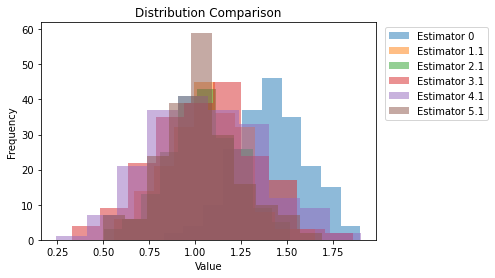

In [249]:
# Create some random data for three distributions
# values1 = np.random.normal(loc=0, scale=1, size=1000)
# values2 = np.random.normal(loc=3, scale=1, size=1000)
# values3 = np.random.normal(loc=-2, scale=0.5, size=1000)

# Plot histograms of the three distributions
plt.hist(est_0_arr, alpha=0.5, label='Estimator 0')
plt.hist(est_1_1_arr, alpha=0.5, label='Estimator 1.1')
plt.hist(est_2_1_arr, alpha=0.5, label='Estimator 2.1')
plt.hist(est_3_1_arr, alpha=0.5, label='Estimator 3.1')
plt.hist(est_4_1_arr, alpha=0.5, label='Estimator 4.1')
plt.hist(est_5_1_arr, alpha=0.5, label='Estimator 5.1')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')

# Add a legend
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))

# Show the plot
plt.show()

all the estimators seem to be similary distributed centered closely to the true ATE of 1 and they seems to have similar n variantion and normally distributed with  the expeption of estimator 0 which looks like is centered close to 1.4. With expeception to the estimator 0, all the other estimators are really close to 1 which is the true ATE.

<h1>Problem 3</h1>

In [250]:
subset = est_table.loc[est_table['estimator-name'].isin(['estimator 0', 'estimator 1.2','estimator 2.2','estimator 3.2','estimator 4.2','estimator 5.2'])]
subset

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.415046,"(1.3878, 1.4423)"
2,estimator 1.2,1.315852,"(1.2899, 1.3418)"
4,estimator 2.2,1.314823,"(1.2882, 1.3414)"
6,estimator 3.2,1.287388,"(1.243, 1.3318)"
8,estimator 4.2,1.270007,"(1.2295, 1.3105)"
10,estimator 5.2,1.040206,"(1.0112, 1.0692)"


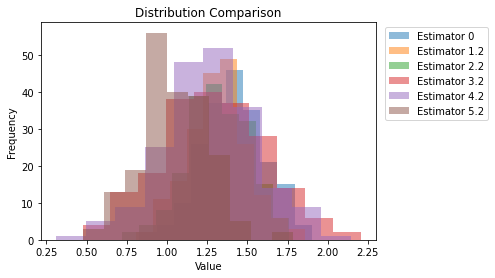

In [251]:
# Create some random data for three distributions
# values1 = np.random.normal(loc=0, scale=1, size=1000)
# values2 = np.random.normal(loc=3, scale=1, size=1000)
# values3 = np.random.normal(loc=-2, scale=0.5, size=1000)

# Plot histograms of the three distributions
plt.hist(est_0_arr, alpha=0.5, label='Estimator 0')
plt.hist(est_1_2_arr, alpha=0.5, label='Estimator 1.2')
plt.hist(est_2_2_arr, alpha=0.5, label='Estimator 2.2')
plt.hist(est_3_2_arr, alpha=0.5, label='Estimator 3.2')
plt.hist(est_4_2_arr, alpha=0.5, label='Estimator 4.2')
plt.hist(est_5_2_arr, alpha=0.5, label='Estimator 5.2')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')

# Add a legend
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))

# Show the plot
plt.show()

almost all estimators seem to do bad and look like the are centered with mean somewhere around 1.4 with the expeption of estimator 5.2 which looks good being almost centered around the true ATE of 1. Besides estimator 5.2, all the estimators seem to have a normal distribution with similar variance. 

Since 5.2 is robust, it was not affected by the incorrect specification of the propensety score and we can see that in fact estimated the true mean pretty close to 1. It is a great benefit to have robust estimators that are not affected too much as long as the conditional expectation function of y is correctly specified.

<h1>Problem 4</h1>

We can see, that if we dont violate the assumptions of unconfoundeness (meaning we observe all the factor that affect treatment assigment and are correlated with the potential outcom) and overlap we can get good estimators close the the TRUE ATE. Estimators 1.1,2.1,3.1,4.1,5.1,5.2 work perfectly because this assumptions are meet even though for 5.2 the propensity score is wrongfully specified, since the regression is correct then we get good estimate. For the other estimates 0,1.2,2.2,3.2,4.2 since we break the first assumption of uncounfundeness and with dont include all the variables then they fail at estimating the true ATE. 

<h1>Problem 5</h1>